# Exercise 1

Use the **load_breast_cancer** data (remember to split your data into a train and a test set). Try to implement a decision tree classifer (with default settings). How well does it perform (i.e. what is its accuracy in diagnosing whether patients have cancer)? 

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# now we construct the data set as X and y

X, y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()
print("classes:", np.unique(y))
# Train test splite
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

classes: [0 1]
(455, 30) (114, 30) (114,) (455,)


In [18]:
# Get the description of the data
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
# Initialize the DT
dt = tree.DecisionTreeClassifier()

# fit using train data
dt.fit(X_train, y_train)

# Predict using test data
y_test_hat = dt.predict(X_test)

# Get the accuracy of the prediction
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT achieved {round(accuracy * 100, 1)}% accuracy and with Depth: {dt.get_depth()}.')

# See features and importance
importance = dt.feature_importances_
names = load_breast_cancer()['feature_names']

feature_importance = pd.DataFrame(zip(names, importance),
                                  columns=['feature', 'importance'])
feature_importance = feature_importance.sort_values(
    'importance', ascending=False).reset_index()
feature_importance[:10]


DT achieved 93.9% accuracy and with Depth: 7.


,index,feature,importance
0,7,mean concave points,0.691420
1,21,worst texture,0.067854
2,27,worst concave points,0.065651
3,20,worst radius,0.052299
4,22,worst perimeter,0.051494
5,19,fractal dimension error,0.018554
6,17,concave points error,0.015931
7,13,area error,0.011983
8,24,worst smoothness,0.009233
9,26,worst concavity,0.008069


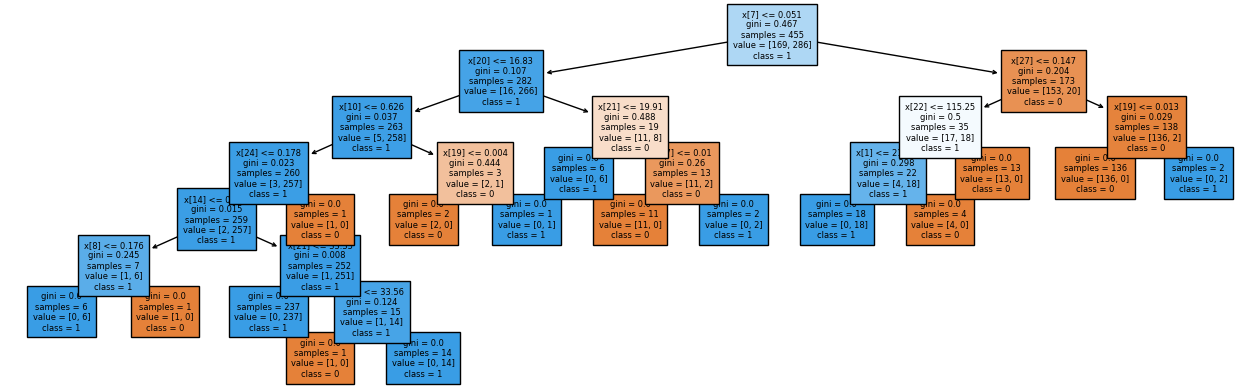

In [23]:
# print the tree (cannot figure out how to get feature names included)
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt, filled=True, class_names=["0", "1"], ax=ax, fontsize=6)
plt.show()

# Exercise 2

Try different values for **max_depth** (must be integers), **min_samples_split** (must be integers OR a fraction), **min_samples_leaf** (must be integers OR a fraction), and **max_features** (can be an integer, a fraction, or one of "auto", "log2").

I suggest going through each setting one at a time, just playing around with a more restricted (specifically smaller) setting than the default value. The reason is that the default value of each is the unrestricted version.

This means that you should try low values for **max_depth**, **min_samples_split**, **min_samples_leaf**, and **max_features**. However, note that you may use 

In [26]:
max_depth = [1,2,3,3/4,5]
results_max_depth = []
for max_depth in max_depth:
    dt_one = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt_one.fit(X_train,y_train)
    y_test_hat_max_depth = dt_one.predict(X_test)
    
    accuracy = accuracy_score(y_test_hat_max_depth,y_test)
    results_max_depth.append[max_depth, accuracy]

print(results_max_depth)



TypeError: 'builtin_function_or_method' object is not subscriptable